## Trading Strategies

## Simple Moving Average

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
import pandas_datareader.data as web
data = web.DataReader('WIPRO.NS', 'yahoo', '2016-01-01','2022-09-30')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1667 entries, 2016-01-01 to 2022-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1667 non-null   float64
 1   Low        1667 non-null   float64
 2   Open       1667 non-null   float64
 3   Close      1667 non-null   float64
 4   Volume     1667 non-null   float64
 5   Adj Close  1667 non-null   float64
dtypes: float64(6)
memory usage: 91.2 KB


SMA1 = 42
SMA2 = 252

data['SMA1'] = data['Close'].rolling(SAM1).mean()
data['SMA2'] = data['Close'].rolling(SAM2).mean()

data.plot(figsize(10,6))




<AxesSubplot:xlabel='Date'>

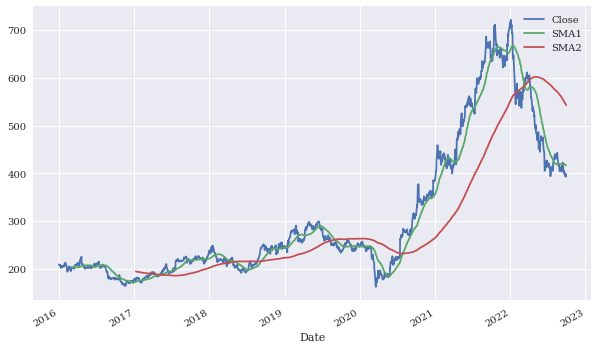

In [4]:
SMA1 = 42
SMA2 = 252

data['SMA1'] = data['Close'].rolling(SMA1).mean()
data['SMA2'] = data['Close'].rolling(SMA2).mean()

data[['Close','SMA1','SMA2']].plot(figsize=(10,6))

In [5]:
data['Position'] = np.where(data['SMA1']> data['SMA2'], 1, -1)
data

,High,Low,Open,Close,Volume,Adj Close,SMA1,SMA2,Position
Date,,,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972626,NaN,NaN,-1
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424088,NaN,NaN,-1
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135132,NaN,NaN,-1
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485046,NaN,NaN,-1
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2022-09-23,399.399994,393.649994,398.100006,394.350006,6983355.0,394.350006,418.266668,546.968453,-1
2022-09-26,399.200012,384.600006,392.000000,394.799988,9497072.0,394.799988,417.790477,545.885913,-1
2022-09-27,401.399994,392.000000,396.799988,398.399994,6227347.0,398.399994,417.628572,544.815477,-1


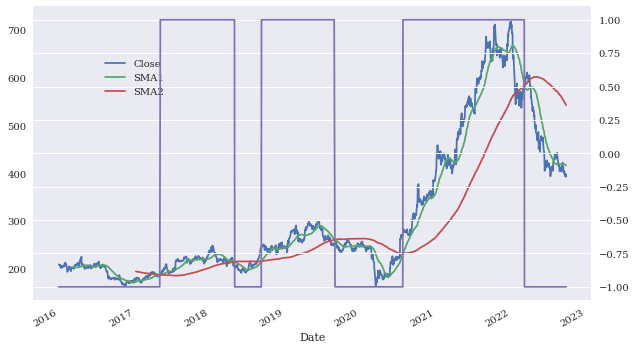

In [6]:
ax = data[['Close','SMA1','SMA2', 'Position']].plot(secondary_y = 'Position', figsize=(10,6))
ax.legend().set_bbox_to_anchor((0.25,0.85))

In [8]:
data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data['Strategy']  = data['Position'].shift(1)*data['Returns']

In [9]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,,,,,,
2022-09-23,399.399994,393.649994,398.100006,394.350006,6983355.0,394.350006,418.266668,546.968453,-1,-0.009088,0.009088
2022-09-26,399.200012,384.600006,392.000000,394.799988,9497072.0,394.799988,417.790477,545.885913,-1,0.001140,-0.001140
2022-09-27,401.399994,392.000000,396.799988,398.399994,6227347.0,398.399994,417.628572,544.815477,-1,0.009077,-0.009077
2022-09-28,400.500000,395.350006,396.000000,398.049988,4460795.0,398.049988,417.423810,543.719246,-1,-0.000879,0.000879
2022-09-29,401.899994,391.549988,401.000000,392.799988,5936931.0,392.799988,416.871429,542.593453,-1,-0.013277,0.013277


In [10]:
np.exp(data[['Returns','Strategy']].sum())

Returns     1.882409
Strategy    2.994667
dtype: float64

In [11]:
data[['Returns', 'Strategy']].std()*252**0.5

Returns     0.263344
Strategy    0.263205
dtype: float64

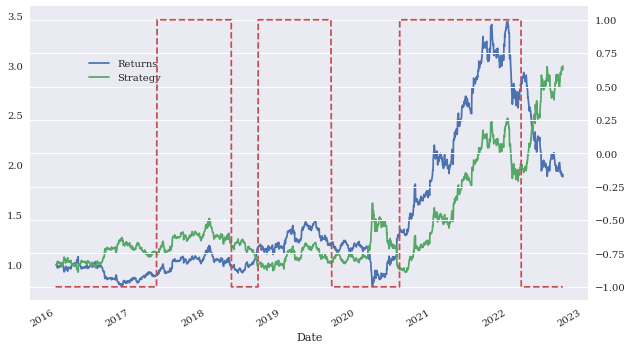

In [14]:
ax = data[['Returns', 'Strategy']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [ ]:
510